In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# module


In [ ]:
! pip install opencv-python

In [ ]:
from warnings import filterwarnings
import tensorflow
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
import scipy
import skimage
from skimage.transform import resize
import random
import os
import seaborn as sns
from tqdm import tqdm


# Import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import data, io
from skimage.util import img_as_ubyte
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.patches as mpatches
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.filters import threshold_mean

# program

In [ ]:
#labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
X_train = []
y_train = []
IMG_SIZE= 64
        
for i in labels:
   # folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/dataset_kaggel/dataset/asl_alphabet_train','asl_alphabet_train',i)
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir/datasetBISINDO','BISINDO Sign Language',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        X_train.append(img)
        y_train.append(i)    
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


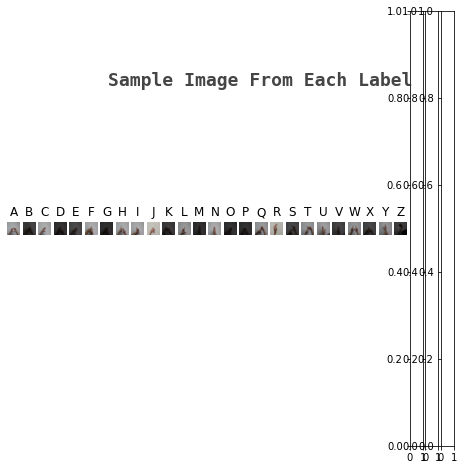

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
'''
sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
'''
X_train.shape
#X_train[0]

k=0
fig, ax = plt.subplots(1,29,figsize=(8,8))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.75,x=0.3,alpha=0.9)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=60)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1

len(X_train)
len(X_test)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

input_shape = (64,64,3)

# load base model
vgg = VGG19(weights='imagenet', input_shape=input_shape, include_top=False)

80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
model = vgg.output
model = tf.keras.layers.GlobalMaxPooling2D()(model)
model = tf.keras.layers.Flatten()(model)
model = tf.keras.layers.Dense(512,activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.25)(model)
model = tf.keras.layers.Dense(26,activation='softmax')(model)#Ganti angka sesuai jumlah kelas
model = tf.keras.models.Model(inputs=vgg.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
#COMPILE
# Learning Rate
#COMPILE
# Learning Rate
initial_learning_rate = 0.0001

# Learning Rate Scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=755,
    decay_rate=0.9,
    staircase=True)

adam = Adam(lr_schedule)

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1 = vgg
for i in range(len(model1.layers)):
    layer = model1.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

1 block1_conv1 (None, 64, 64, 64)
2 block1_conv2 (None, 64, 64, 64)
4 block2_conv1 (None, 32, 32, 128)
5 block2_conv2 (None, 32, 32, 128)
7 block3_conv1 (None, 16, 16, 256)
8 block3_conv2 (None, 16, 16, 256)
9 block3_conv3 (None, 16, 16, 256)
10 block3_conv4 (None, 16, 16, 256)
12 block4_conv1 (None, 8, 8, 512)
13 block4_conv2 (None, 8, 8, 512)
14 block4_conv3 (None, 8, 8, 512)
15 block4_conv4 (None, 8, 8, 512)
17 block5_conv1 (None, 4, 4, 512)
18 block5_conv2 (None, 4, 4, 512)
19 block5_conv3 (None, 4, 4, 512)
20 block5_conv4 (None, 4, 4, 512)


In [ ]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layers = model1.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model1.layers[1].get_weights()
layer_outputs = model1.layers[1].output
model1_Input = model1.input
print('Layer Name is :', layers[1].name, '\nFitler Shaper:',filters.shape)

Layer Name is : block1_conv1 
Fitler Shaper: (3, 3, 3, 64)


In [ ]:
# plot filters

fig1=plt.figure(figsize=(20, 15))
columns = 8
rows = 8
n_filters = columns * rows
'''
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()   
''' 

"\nfor i in range(1, n_filters +1):\n    f = filters[:, :, :, i-1]\n    fig1 =plt.subplot(rows, columns, i)\n    fig1.set_xticks([])  #Turn off axis\n    fig1.set_yticks([])\n    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)\n    #ix += 1\nplt.show()   \n"

<Figure size 1440x1080 with 0 Axes>

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/VGG19bagas8april.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=0)
A = 8

history= model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=A, 
          batch_size=6,
          callbacks=checkpoint)

Epoch 1/8
70/70 [==============================] - 78s 1s/step - loss: 0.8148 - accuracy: 0.7356 - val_loss: 0.4530 - val_accuracy: 0.8077
Epoch 2/8
70/70 [==============================] - 80s 1s/step - loss: 0.4985 - accuracy: 0.8101 - val_loss: 0.2489 - val_accuracy: 0.9231
Epoch 3/8
70/70 [==============================] - 78s 1s/step - loss: 0.3664 - accuracy: 0.8774 - val_loss: 0.1641 - val_accuracy: 0.9423
Epoch 4/8
70/70 [==============================] - 77s 1s/step - loss: 0.2220 - accuracy: 0.9135 - val_loss: 0.2457 - val_accuracy: 0.9327
Epoch 5/8
70/70 [==============================] - 77s 1s/step - loss: 0.2748 - accuracy: 0.9231 - val_loss: 0.1702 - val_accuracy: 0.9615
Epoch 6/8
70/70 [==============================] - 77s 1s/step - loss: 0.1058 - accuracy: 0.9615 - val_loss: 0.0912 - val_accuracy: 0.9808
Epoch 7/8
70/70 [==============================] - 76s 1s/step - loss: 0.0449 - accuracy: 0.9904 - val_loss: 0.0996 - val_accuracy: 0.9712
Epoch 8/8
70/70 [==========

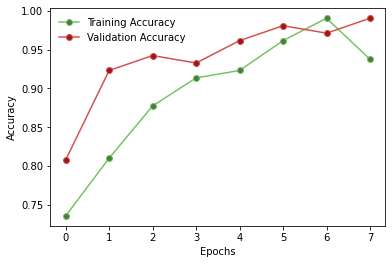

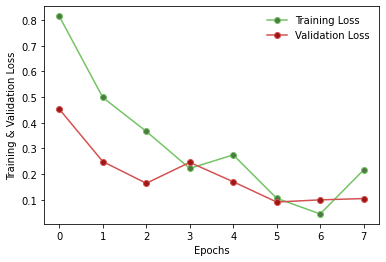

  
accuracy: 93.87 %


In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(A)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


fig.text(s='Accuracy, loss, Recall, And Precision',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1], y=0.95, x=0.28, alpha=0.8)

sns.despine()
plt.plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
plt.plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
plt.legend(frameon=False)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


sns.despine()
plt.plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
plt.plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
plt.legend(frameon=False)
plt.xlabel('Epochs')
plt.ylabel('Training & Validation Loss')
plt.show()
print ('================')
print ('  ')
# Python 3 code to find sum
# of elements in given array
def _sum(arr):
	
	# initialize a variable
	# to store the sum
	# while iterating through
	# the array later
	sum=0
	
	# iterate through the array
	# and add each element to the sum variable
	# one at a time
	for i in arr:
		sum = sum + i
		
	return(sum)

# driver function
arr=[]
# input values to list
#arr = [12, 3, 4, 15]
val_acc = history.history['val_accuracy']
arr = val_acc
# calculating length of array
n = len(arr)

ans = _sum(arr)
accuracy = (ans/A)*100
accuracy = round(accuracy, 2)
# display sum
print ('accuracy:', accuracy, '%')

# This code is contributed by Himanshu Ranjan